In [0]:
import matplotlib.pyplot as plt
from google.colab import drive
import pandas as pd
import numpy as np
import math
import os
#drive.mount('/content/gdrive')
root = 'gdrive/My Drive/colab/titanic/train.csv'
df1 = pd.read_csv(root)

In [0]:
df1['Age'].value_counts(sort=True, bins=[10,20,30,40,50,60,70])

(20.0, 30.0]     230
(30.0, 40.0]     155
(9.999, 20.0]    117
(40.0, 50.0]      86
(50.0, 60.0]      42
(60.0, 70.0]      17
Name: Age, dtype: int64

In [0]:
data = np.arange(10,30,2)
data

array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28])

In [0]:
from numpy import *
print(mean(data, axis=0))
std_data = (data-mean(data,axis=0)) / std(data, axis=0)

19.0


In [0]:
import scipy.stats as ss

In [0]:
ss.zscore(data)

array([ 1.12770882,  1.29354835, -1.35988416, -0.86236556, -1.0282051 ,
       -1.0282051 , -0.03316791,  1.29354835,  0.79602975, -0.19900744])

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
data=data.reshape(-1,1)
std_data=StandardScaler().fit_transform(data)
median(std_data)

0.0

# 이상치가 포함되어있는 데이터셋을 표준화하기
>> so that mean = 0, std = 1

In [0]:
#이상치가 있는 데이터셋의 표준화 -- robust scalar
#평군, 쵸준편차는 이상키의 영향을 크게 받기 때문
#중앙값(Q2), IQR(Q3-Q1)
#Robust scaler x-median() / IQR

In [0]:
mu, sigma = 10, 3
np.random.seed(42)
x=mu+sigma*np.random.randn(100)
import matplotlib.pyplot as plt


9.688460447817718
2.7108485299338883


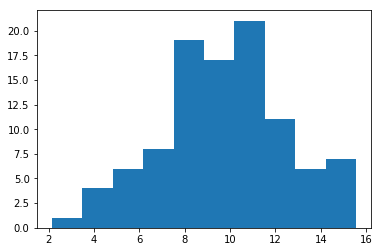

In [0]:
plt.hist(x)
print(mean(x))
print(std(x))

>> ## 여기에 이상치를 줍니다

14.222534840086327


(array([74., 21.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  5.]),
 array([  2.14076469,  11.92668822,  21.71261175,  31.49853528,
         41.28445881,  51.07038234,  60.85630588,  70.64222941,
         80.42815294,  90.21407647, 100.        ]),
 <a list of 10 Patch objects>)

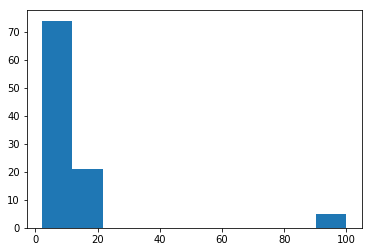

In [0]:
x[95:100]=100
print(mean(x))
plt.hist(x)

(array([ 0.,  1.,  8., 13., 30., 23., 12.,  8.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  5.]),
 array([  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,
         26,  28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,
         52,  54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,
         78,  80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100]),
 <a list of 50 Patch objects>)

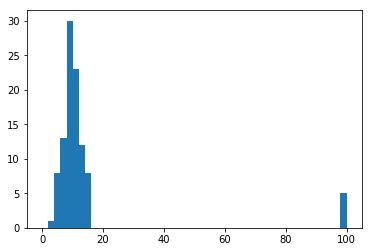

In [0]:
plt.hist(x, bins=np.arange(0,101,2))

## Testing Standard Scaler
>> STD_sc = x - mean(x) / std

>> therefore prone to outliers

(9, 1)


(array([1., 1., 2., 0., 1., 0., 2., 0., 1., 1.]),
 array([-1.49099863, -1.17525775, -0.85951686, -0.54377597, -0.22803509,
         0.0877058 ,  0.40344669,  0.71918758,  1.03492846,  1.35066935,
         1.66641024]),
 <a list of 10 Patch objects>)

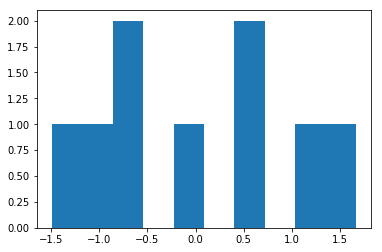

In [0]:
x = x.reshape(-1,1)
print(np.shape(x))
std_x = StandardScaler().fit_transform(x)
plt.hist(std_x) #it wasn't very effective..!

(array([ 0.,  1.,  9., 43., 35.,  7.,  0.,  0.,  0.]),
 array([-1.00000000e+00, -8.00000000e-01, -6.00000000e-01, -4.00000000e-01,
        -2.00000000e-01, -2.22044605e-16,  2.00000000e-01,  4.00000000e-01,
         6.00000000e-01,  8.00000000e-01]),
 <a list of 9 Patch objects>)

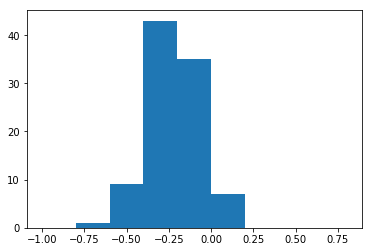

In [0]:
std_o=std_x[std_x<4]
plt.hist(std_o, bins=np.arange(-1,1,0.2))

## Testing Robust Scaler
>> robust scalers use median instead of mean, which is less prone to the outliers


In [0]:
mean(x)
median(x)
Q1=percentile(x, 25)
Q3=percentile(x, 75)
IQR = Q3 - Q1

median:  0.0 mean:  1.1764297439010134


(array([ 1.,  4.,  5.,  8., 19., 15., 19., 11.,  6.,  7.]),
 array([-2.0654536 , -1.7054622 , -1.3454708 , -0.9854794 , -0.62548801,
        -0.26549661,  0.09449479,  0.45448619,  0.81447759,  1.17446899,
         1.53446039]),
 <a list of 10 Patch objects>)

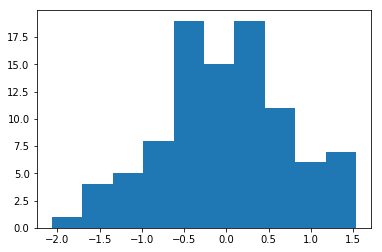

In [0]:
from sklearn.preprocessing import RobustScaler
rbs_x = RobustScaler().fit_transform(x)
print('median: ',median(rbs_x), 'mean: ', mean(rbs_x))
rbs_o=rbs_x[rbs_x<5]
plt.hist(rbs_o)

## Min Max Scaling
>> Xn = x - x_min / x_max - x_min

>> is done through MinMaxScaler()

In [0]:
from sklearn.preprocessing import MinMaxScaler

x= np.array([[9,-1,2],
            [5,0,1],
            [1,10,4],
            [4,7,-2]])

# column 단위의 min.max 계산
x.min(axis=0)
x.max(axis=0)
scaled = (x - x.min(axis=0)) / (x.max(axis=0)- x.min(axis=0))
scaled

array([[1.        , 0.        , 0.66666667],
       [0.5       , 0.09090909, 0.5       ],
       [0.        , 1.        , 1.        ],
       [0.375     , 0.72727273, 0.        ]])

Method 1:

In [0]:
x_minmax=MinMaxScaler().fit_transform(x)
x_minmax

array([[1.        , 0.        , 0.66666667],
       [0.5       , 0.09090909, 0.5       ],
       [0.        , 1.        , 1.        ],
       [0.375     , 0.72727273, 0.        ]])

Method 2:

In [0]:
from sklearn.preprocessing import minmax_scale
minmax_scale(x,axis=0)

array([[1.        , 0.        , 0.66666667],
       [0.5       , 0.09090909, 0.5       ],
       [0.        , 1.        , 1.        ],
       [0.375     , 0.72727273, 0.        ]])

## 이항변수화 변환
>> 연속형 변수값을 0 또는 1로 변환

>> [explannation](http://sebastianraschka.com/Articles/2014_about_feature_scaling.html#standardization-and-min-max-scaling)

In [0]:
from sklearn.preprocessing import Binarizer
x = np.array([[5,-3,2],[7,-1,0],[0,9,5]])

기준값 (threshold)을 3으로 주는 경우

In [0]:
bnr = Binarizer(3).fit(x)
bnr.transform(x)

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 1]])

In [0]:
bnr2 = Binarizer(2).fit(x)
bnr2.transform(x) ## threshold and down goes 0, up goes 1

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 1]])

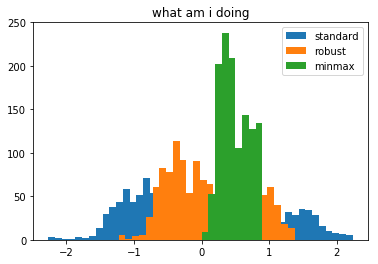

In [0]:
tsla = pd.read_csv('gdrive/My Drive/colab/TSLA.csv').iloc[:,[0,4]]
tgt = tsla['Close'].values.reshape(-1,1)
import sklearn.preprocessing as skp

tgt_s = skp.StandardScaler().fit_transform(tgt)
tgt_r = skp.RobustScaler().fit_transform(tgt)
tgt_m = skp.minmax_scale(tgt,axis=0)


plt.hist(tgt_s, bins=(np.arange(min(tgt_s),max(tgt_s),.1)), label='standard')
plt.hist(tgt_r, bins=(np.arange(min(tgt_r),max(tgt_r),.1)), label='robust')
plt.hist(tgt_m, bins=(np.arange(min(tgt_m),max(tgt_m),.1)), label='minmax')
plt.title('what am i doing')
plt.legend()
plt.show()
